## Training a classifier for MNIST dataset using pytorch

In [129]:
import torch
import torchvision
import torchvision.transforms as transforms 

In [130]:
#dataset (Dataset) – dataset from which to load the data.
#batch_size (int, optional) – how many samples per batch to load (default: 1).
#shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
#num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

In [131]:
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='/tmp', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='/tmp', download=True, train=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)


In [132]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [133]:
import matplotlib.pyplot as plt
import numpy as np

torch.Size([4, 1, 28, 28])
7
8
4
2


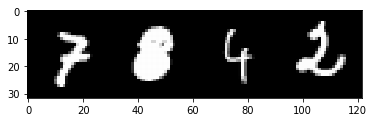

In [134]:
#visualising data 
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
show(torchvision.utils.make_grid(images))

for j in range(4):
    print(classes[labels[j]])



### ARTIFICIAL NEURAL NETWORK 

In [104]:
import torch.nn as nn
import torch.nn.functional as F

In [138]:
class SequentialMNIST(nn.Module):
    def __init__(self):
        super(SequentialMNIST, self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256,10)
        
    def forward(self, x):
        x = F.relu(self.linear1(x.view(4, -1)))
        x = self.linear2(x)
        return x

net = SequentialMNIST()

In [139]:
import torch.optim as optim

#defining loss function 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [145]:
# training
for epoch in range(8):
    running_loss=0.0
    for i, data in enumerate(trainloader): ###
        inputs, labels = data
        optimizer.zero_grad() ###

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.5f' % (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 0.00000
[1,  4000] loss: 0.00003
[1,  6000] loss: 0.00000
[1,  8000] loss: 0.00000
[1, 10000] loss: 0.00020
[1, 12000] loss: 0.00000
[1, 14000] loss: 0.00000
[2,  2000] loss: 0.00000
[2,  4000] loss: 0.00001
[2,  6000] loss: 0.00001
[2,  8000] loss: 0.00000
[2, 10000] loss: 0.00000
[2, 12000] loss: 0.00000
[2, 14000] loss: 0.00001
[3,  2000] loss: 0.00001
[3,  4000] loss: 0.00000
[3,  6000] loss: 0.00000
[3,  8000] loss: 0.00000
[3, 10000] loss: 0.00000
[3, 12000] loss: 0.00000
[3, 14000] loss: 0.00000
[4,  2000] loss: 0.00000
[4,  4000] loss: 0.00000
[4,  6000] loss: 0.00000
[4,  8000] loss: 0.00000
[4, 10000] loss: 0.00000
[4, 12000] loss: 0.00002
[4, 14000] loss: 0.00000
[5,  2000] loss: 0.00000
[5,  4000] loss: 0.00000
[5,  6000] loss: 0.00000
[5,  8000] loss: 0.00003
[5, 10000] loss: 0.00000
[5, 12000] loss: 0.00000
[5, 14000] loss: 0.00000
[6,  2000] loss: 0.00000
[6,  4000] loss: 0.00000
[6,  6000] loss: 0.00000
[6,  8000] loss: 0.00000
[6, 10000] loss: 0.00000


In [146]:
total = 0
correct = 0
with torch.no_grad():
    for data in testloader:
        inputs , labels = data
        outputs = net(inputs)
        total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted==labels).sum().item()
print('accuracy of network on 10000 test images: %d ' % (100*correct/total))

accuracy of network on 10000 test images: 99 


### CONVNET ON MNIST

In [160]:
class ConvMNIST(nn.Module):
    def __init__(self):
        super(ConvMNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.relu(self.fc1(x.view(-1, 16*4*4)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
convnet = ConvMNIST()

In [161]:
# training
for epoch in range(8):
    running_loss=0.0
    for i, data in enumerate(trainloader): ###
        inputs, labels = data
        optimizer.zero_grad() ###

        outputs = convnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.5f' % (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 0.00117
[1,  4000] loss: 0.00114
[1,  6000] loss: 0.00115
[1,  8000] loss: 0.00113
[1, 10000] loss: 0.00115
[1, 12000] loss: 0.00116
[1, 14000] loss: 0.00115
[2,  2000] loss: 0.00116
[2,  4000] loss: 0.00114
[2,  6000] loss: 0.00115
[2,  8000] loss: 0.00115
[2, 10000] loss: 0.00116
[2, 12000] loss: 0.00117
[2, 14000] loss: 0.00117
[3,  2000] loss: 0.00116
[3,  4000] loss: 0.00113
[3,  6000] loss: 0.00116
[3,  8000] loss: 0.00114
[3, 10000] loss: 0.00117
[3, 12000] loss: 0.00114
[3, 14000] loss: 0.00114
[4,  2000] loss: 0.00113
[4,  4000] loss: 0.00114
[4,  6000] loss: 0.00118
[4,  8000] loss: 0.00117
[4, 10000] loss: 0.00116
[4, 12000] loss: 0.00114
[4, 14000] loss: 0.00117
[5,  2000] loss: 0.00115
[5,  4000] loss: 0.00115
[5,  6000] loss: 0.00117
[5,  8000] loss: 0.00114
[5, 10000] loss: 0.00115
[5, 12000] loss: 0.00113
[5, 14000] loss: 0.00114
[6,  2000] loss: 0.00118
[6,  4000] loss: 0.00113
[6,  6000] loss: 0.00117
[6,  8000] loss: 0.00119
[6, 10000] loss: 0.00115


In [163]:
total = 0
correct = 0
with torch.no_grad():
    for data in testloader:
        inputs , labels = data
        outputs = convnet(inputs)
        total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted==labels).sum().item()
print('accuracy of network on 10000 test images: %d ' % (100*correct/total))

accuracy of network on 10000 test images: 9 
